###Download Data

Download Data Section
- Make the imports
- Download healthy data with linux system command wget
- Check if the data is there, make a directory, move the data there.
- Do the same things for faulty data

In [1]:
import numpy as np
import pandas as pd
import scipy.io 
import os
import glob

In [2]:
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/97.mat
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/98.mat
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/99.mat
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/100.mat

--2020-06-18 23:00:36--  http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/97.mat
Resolving csegroups.case.edu (csegroups.case.edu)... 129.22.25.84
Connecting to csegroups.case.edu (csegroups.case.edu)|129.22.25.84|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/97.mat [following]
--2020-06-18 23:00:36--  https://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/97.mat
Connecting to csegroups.case.edu (csegroups.case.edu)|129.22.25.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3903344 (3.7M)
Saving to: ‘97.mat’

97.mat              100%[===================>]   3.72M  11.9MB/s    in 0.3s    

2020-06-18 23:00:37 (11.9 MB/s) - ‘97.mat’ saved [3903344/3903344]

--2020-06-18 23:00:38--  http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/98.mat
Resolving csegroups.case.e

In [3]:
!ls

100.mat  97.mat  98.mat  99.mat  sample_data


In [4]:
!mkdir  cwr_healthy
!ls

100.mat  97.mat  98.mat  99.mat  cwr_healthy  sample_data


In [5]:
!mv *.mat cwr_healthy/

In [6]:
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/105.mat
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/106.mat
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/107.mat
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/108.mat

--2020-06-18 23:00:54--  http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/105.mat
Resolving csegroups.case.edu (csegroups.case.edu)... 129.22.25.84
Connecting to csegroups.case.edu (csegroups.case.edu)|129.22.25.84|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/105.mat [following]
--2020-06-18 23:00:54--  https://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/105.mat
Connecting to csegroups.case.edu (csegroups.case.edu)|129.22.25.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2910768 (2.8M)
Saving to: ‘105.mat’

105.mat             100%[===================>]   2.78M  7.37MB/s    in 0.4s    

2020-06-18 23:00:55 (7.37 MB/s) - ‘105.mat’ saved [2910768/2910768]

--2020-06-18 23:00:56--  http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/106.mat
Resolving csegroups.

In [7]:
!mkdir cwr_faulty
!mv *.mat cwr_faulty/

In [8]:
!ls cwr_faulty/

105.mat  106.mat  107.mat  108.mat


In [9]:
!ls cwr_healthy/

100.mat  97.mat  98.mat  99.mat


###Check .mat files

Check .mat files Section
- We write a function to check the “keys” in a .mat file (this file acts like a python
dictionary).
- We write another function to check the data files in a folder, using our previous function.

In [10]:
def matcheck(filepath):
  mat = scipy.io.loadmat(filepath)

  for key, value in mat.items():
    print(key)
  
  print('\n'*2)



  
def check_folder(folder):
  for file in glob.glob(os.path.join(folder,'*.mat')):
    print('Now reading: ',file)
    matcheck(file)

In [11]:
check_folder('cwr_healthy')

Now reading:  cwr_healthy/100.mat
__header__
__version__
__globals__
X100_DE_time
X100_FE_time
X100RPM



Now reading:  cwr_healthy/98.mat
__header__
__version__
__globals__
X098_DE_time
X098_FE_time



Now reading:  cwr_healthy/99.mat
__header__
__version__
__globals__
ans
X098_DE_time
X098_FE_time
X099_DE_time
X099_FE_time



Now reading:  cwr_healthy/97.mat
__header__
__version__
__globals__
X097_DE_time
X097_FE_time
X097RPM





###Read Folder Function

Read Folder Section
- A function to read the data in a folder and combine all data in one numpy array.
- For every .mat file, it reads the file and takes the data values using the relevant keys of
the dict. (these keys are 'DE_time' and 'FE_time')
- It uses a variable to aggregate the data, the var is called “data”. If “data” is empty, that
means we are reading the first file, so we assign the information in the variable “a” to
“data”.
- Variable “a” is to store the particular value of a particular file that we read just right now.
- We skip some information if the shapes do not fit between “data” and “a”.
- We put an “id” column to the “data” object, to know which rows come from which file
- We also put the third column values (just to fill, as zeroes) to the relevant rows, if the
third column is empty.

In [12]:
def read_folder(folder):

    data = 'dummy'
    skip = False

    for file in os.listdir(folder):

        file_id = file.split('.')[0]

        mat_file_dict = scipy.io.loadmat(folder+file)

        del data

        for key, value in mat_file_dict.items():
            if 'DE_time' in key or 'FE_time' in key:
                a = np.array(mat_file_dict[key])
        
                try:
                    data
                except NameError:
                    data = a
                else:
                    if (data.shape[0] != a.shape[0]):
                        print('skipping ' + file_id)
                        skip = True
                        continue
                    else:
                      data = np.hstack((data,a))


        if skip:
            skip=False
            continue


        id = np.repeat(file_id,data.shape[0])
        id.shape = (id.shape[0],1)
        data = np.hstack((id,data))


        if data.shape[1] == 2:
            zeros = np.zeros(data.shape[0])
            zeros = zeros.reshape((data.shape[0],1))
            data = np.hstack((data,zeros))

            
        try:
            result
        except NameError:
            result = data
        else:
            result = np.vstack((result,data))
    return result

### Read & Save

Read & Save Section
- We check if our function works
- We use our function, then we save the outputs to our drive as .csv files

In [13]:
result_healthy = read_folder('./cwr_healthy/')

hdf = pd.DataFrame(result_healthy)

hdf.head()



skipping 99
skipping 99


,0,1,2
0,100,0.014603076923076923,0.19292181818181817
1,100,0.05444861538461539,0.16436363636363635
2,100,0.10764553846153846,0.09081090909090908
3,100,0.13372246153846154,0.08649636363636364
4,100,0.11265230769230769,0.09923454545454545


In [14]:
result_faulty = read_folder('./cwr_faulty/')

fdf = pd.DataFrame(result_faulty)

print(fdf.head())



     0                    1                     2
0  108   0.2226985628742515  -0.09738545454545454
1  108  0.09323776447105789               -0.1808
2  108  -0.1465164870259481   -0.2336018181818182
3  108   0.1772167265469062  -0.10211090909090909
4  108    0.248525748502994  -0.03328363636363636


In [15]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=False)
%cd /content/drive/My Drive/
!ls
hdf.to_csv('result_healthy_pandas.csv', header=False, index=True)
fdf.to_csv('result_faulty_pandas.csv', header=False, index=True)
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive
'16 Haziran Piknik'
 353.gslides
'a-comp backup'
'AD302 Ahmet Melek.mp4'
 AD302.gdoc
 AD302.gslides
 Ad353.gdoc
 Ad353.gsheet
 Ad353.gslides
'AD 353 Project Presentation Ahmet & Emre.mp4'
'AD483 Assignment.gslides'
'Adsız doküman.gdoc'
'Adsız sunu (1).gslides'
'Adsız sunu.gslides'
'Ahmet Melek Assignment 4.gdoc'
'Ahmet Melek Assignment 5.gdoc'
'Ahmet Melek Curriculum Vitae.pdf'
'Ahmet Melek Emre Bolat.docx'
'Ahmet Melek Ind Ass 1&2.gd

### Data Examination 1

Data Examination 1
- We check if our .csv files are saved correctly, by examining id columns

Examine Healthy

In [16]:
!ls

'16 Haziran Piknik'
 353.gslides
'a-comp backup'
'AD302 Ahmet Melek.mp4'
 AD302.gdoc
 AD302.gslides
 Ad353.gdoc
 Ad353.gsheet
 Ad353.gslides
'AD 353 Project Presentation Ahmet & Emre.mp4'
'AD483 Assignment.gslides'
'Adsız doküman.gdoc'
'Adsız sunu (1).gslides'
'Adsız sunu.gslides'
'Ahmet Melek Assignment 4.gdoc'
'Ahmet Melek Assignment 5.gdoc'
'Ahmet Melek Curriculum Vitae.pdf'
'Ahmet Melek Emre Bolat.docx'
'Ahmet Melek Ind Ass 1&2.gdoc'
'Ahmet Melek Self Reflect - Column chart 1.gsheet'
'Ahmet Melek Self Reflect.gdoc'
'Ahmet Melek Self Reflect - Sütun grafik 1 (1).gsheet'
'Ahmet Melek Self Reflect - Sütun grafik 1.gsheet'
'Ahmet Melek Transcript (1).pdf'
'Ahmet Melek Transcript.pdf'
'amme hizmeti1.zip'
'amme hizmeti2.zip'
'amme hizmeti3.zip'
'amme hizmeti4.zip'
'amme hizmeti5.zip'
'Applied 2020.06.06'
'Applied AI 2020-2 Daily Flow.gdoc'
'Assignment 1 Ahmet Melek.gdoc'
'Başlıksız form.gform'
'Bilgisayar Görüsü'
'Bölüm Özellikleri.gdoc'
'Case: Arif Rug&Carpet Company.gdoc'
 ce

In [17]:
import pandas as pd
df_healthy = pd.read_csv('result_healthy_pandas.csv', engine='python', header=None)
df_healthy.head()

,0,1,2,3
0,0,100,0.014603,0.192922
1,1,100,0.054449,0.164364
2,2,100,0.107646,0.090811
3,3,100,0.133722,0.086496
4,4,100,0.112652,0.099235


In [18]:
print(df_healthy.loc[df_healthy[1] == 100][:5])

   0    1         2         3
0  0  100  0.014603  0.192922
1  1  100  0.054449  0.164364
2  2  100  0.107646  0.090811
3  3  100  0.133722  0.086496
4  4  100  0.112652  0.099235


Examine Faulty

In [19]:
import numpy
df_faulty = pd.read_csv('result_faulty_pandas.csv', engine='python', header=None)
print(numpy.shape(df_faulty))
df_faulty.head()

(488309, 4)


,0,1,2,3
0,0,108,0.222699,-0.097385
1,1,108,0.093238,-0.180800
2,2,108,-0.146516,-0.233602
3,3,108,0.177217,-0.102111
4,4,108,0.248526,-0.033284


Check which machine's data is where


In [20]:
for i,item in enumerate(df_faulty[1]):
  if(i%70000 == 0):
    print (item)

108
108
107
107
105
105
106


### Data Examination 2

Data Examination 2
- We only use the relevant columns (meaning, not id column, but value columns) and form
a numpy array
- We plot our data using the numpy array

In [21]:
from matplotlib import pyplot as plt
from pandas import concat
%matplotlib inline

This is the function to get the recordings of a particular machine.

In [22]:
np.array(df_healthy.sort_values(by=0, ascending=True).loc[df_healthy[1] == 100].drop(columns=[0,1]))[:5]

array([[0.01460308, 0.19292182],
       [0.05444862, 0.16436364],
       [0.10764554, 0.09081091],
       [0.13372246, 0.08649636],
       [0.11265231, 0.09923455]])

In [23]:
def get_recording(df,file_id):
    return np.array(df.sort_values(by=0, ascending=True).loc[df[1] == file_id].drop(columns = [0,1]))


In [24]:
healthy_sample = get_recording(df_healthy,100)
faulty_sample = get_recording(df_faulty,105)
print(numpy.shape(faulty_sample))

(121265, 2)


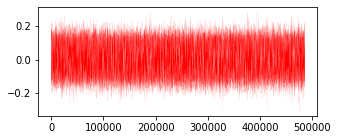

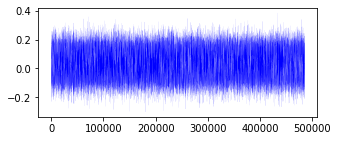

In [25]:
fig, ax = plt.subplots(figsize=(5, 2), facecolor='w', edgecolor='k')
size = len(healthy_sample)
ax.plot(range(0,size), healthy_sample[:,0], '-', color='red', animated = True, linewidth=0.05)

fig, ax = plt.subplots(figsize=(5, 2), facecolor='w', edgecolor='k')
size = len(healthy_sample)
ax.plot(range(0,size), healthy_sample[:,1], '-', color='blue', animated = True, linewidth=0.05)

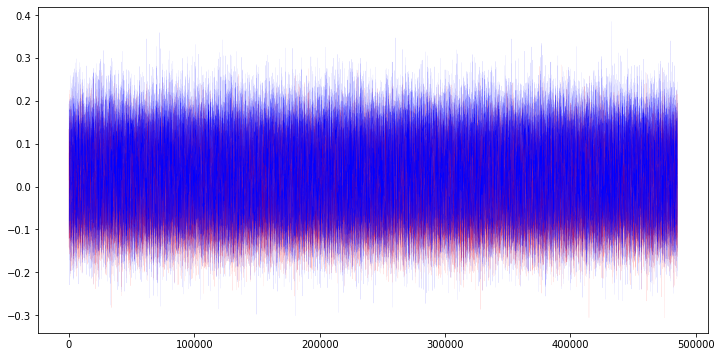

In [26]:

fig, ax = plt.subplots(figsize=(12, 6), facecolor='w', edgecolor='k')
size = len(healthy_sample)
ax.plot(range(0,size), healthy_sample[:,0], '-', color='red', animated = True, linewidth=0.05)
ax.plot(range(0,size), healthy_sample[:,1], '-', color='blue', animated = True, linewidth=0.05)

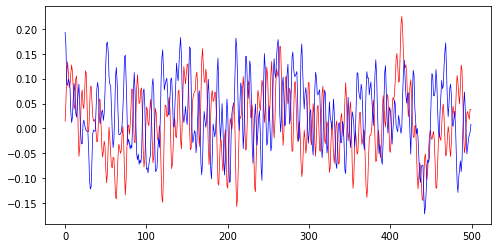

In [27]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(range(0,500), healthy_sample[:500,0], '-', color='red', animated = True, linewidth=0.7)
ax.plot(range(0,500), healthy_sample[:500,1], '-', color='blue', animated = True, linewidth=0.7)

###Data Examination 3

Data Examination 3
- We do other plottings, to:
- Compare the amplitudes of the signals
- Compare the lengths of the signals
- Zoom in and compare the shapes of the signals

In [28]:
healthy_sample = get_recording(df_healthy,100)
faulty_sample = get_recording(df_faulty,105)
print(numpy.shape(faulty_sample))

(121265, 2)


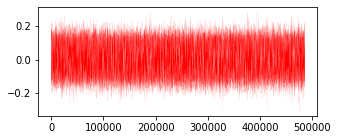

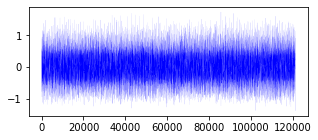

In [29]:
hsize = len(healthy_sample)
fig, ax = plt.subplots(figsize=(5, 2), facecolor='w', edgecolor='k')
ax.plot(range(0,hsize), healthy_sample[:,0], '-', color='red', animated = True, linewidth=0.05)

fsize = len(faulty_sample)
fig, ax = plt.subplots(figsize=(5, 2), facecolor='w', edgecolor='k')
ax.plot(range(0,fsize), faulty_sample[:,0], '-', color='blue', animated = True, linewidth=0.05)

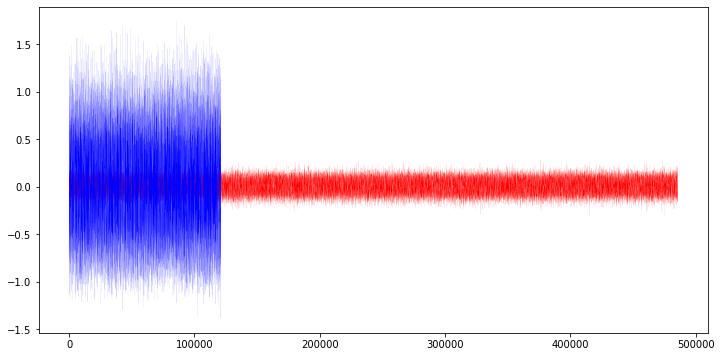

In [30]:

fig, ax = plt.subplots(figsize=(12, 6), facecolor='w', edgecolor='k')
size = len(healthy_sample)
ax.plot(range(0,hsize), healthy_sample[:,0], '-', color='red', animated = True, linewidth=0.05)
ax.plot(range(0,fsize), faulty_sample[:,0], '-', color='blue', animated = True, linewidth=0.05)

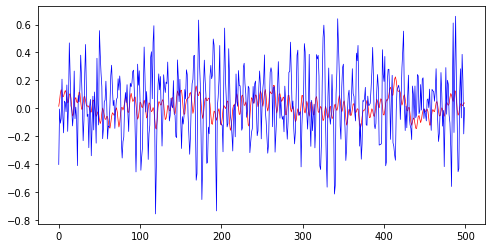

In [31]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(range(0,500), healthy_sample[:500,0], '-', color='red', animated = True, linewidth=0.7)
ax.plot(range(0,500), faulty_sample[:500,1], '-', color='blue', animated = True, linewidth=0.7)